In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

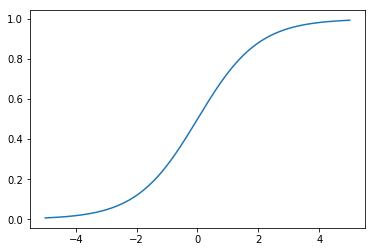

In [2]:
X = np.linspace(-5,5,200)
y = [1/(1+math.e**(-x)) for x in X]
plt.plot(X,y)
plt.show()

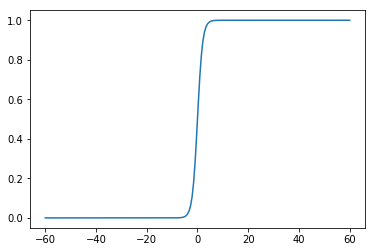

In [3]:
X = np.linspace(-60,60,200)
y = [1/(1+math.e**(-x)) for x in X]
plt.plot(X,y)
plt.show()

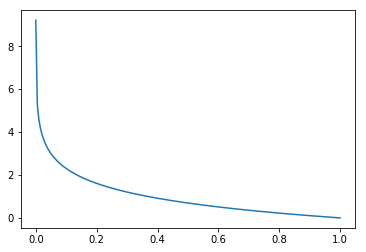

In [4]:
X = np.linspace(0.0001,1,200)
y = [(-np.log(x)) for x in X]
plt.plot(X,y)
plt.show()

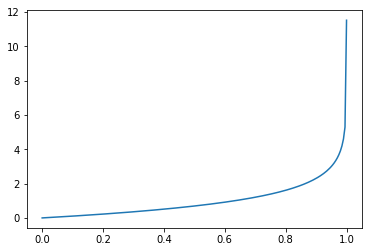

In [5]:
X = np.linspace(0,0.99999,200)
y = [(-np.log(1-x)) for x in X]
plt.plot(X,y)
plt.show()

In [7]:
import pandas as pd
import numpy as np
dataSet = pd.read_table('testSet.txt',header = None)
dataSet.columns =['X1','X2','labels']
dataSet.head()

,X1,X2,labels
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [8]:
def sigmoid(inX):
    s = 1/(1+np.exp(-inX))
    return s

In [9]:
sigmoid(5)

0.9933071490757153

In [10]:
sigmoid(0)

0.5

In [11]:
sigmoid(-5)

0.0066928509242848554

In [12]:
def regularize(xMat):
    inMat = xMat.copy()
    inMeans = np.mean(inMat,axis = 0)
    inVar = np.std(inMat,axis = 0)
    inMat = (inMat - inMeans)/inVar
    return inMat

In [13]:
dataSet.head()

,X1,X2,labels
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [15]:
#np.mat(dataSet.iloc[:,:-1].values)

In [18]:
#np.mat(dataSet.iloc[:,-1].values).T

In [19]:
xMat = np.mat(dataSet.iloc[:,:-1].values)
yMat = np.mat(dataSet.iloc[:,-1].values).T

In [20]:
m,n = xMat.shape
weights = np.zeros((n,1))
weights

array([[0.],
       [0.]])

In [21]:
def BGD_LR(dataSet,alpha=0.001,maxCycles=500):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    xMat = regularize(xMat)
    m,n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(maxCycles):
        grad = xMat.T*(xMat * weights-yMat)/m
        weights = weights -alpha*grad
    return weights

In [22]:
BGD_LR(dataSet,alpha=0.001,maxCycles=500)

matrix([[ 0.00216921],
        [-0.16320532]])

In [24]:
ws=BGD_LR(dataSet,alpha=0.01,maxCycles=500)

In [25]:
xMat = np.mat(dataSet.iloc[:, :-1].values)
yMat = np.mat(dataSet.iloc[:, -1].values).T
xMat = regularize(xMat)
(xMat * ws).A.flatten()

array([-0.70915655,  0.06316312, -0.06083467, -0.16569736, -0.39005307,
       -0.01533216, -0.52906893, -0.23235356, -0.23599289, -0.36795332,
        0.03505109, -0.51406386,  0.41592948, -0.38697784,  0.02891359,
        0.54454538,  0.03555741,  0.36098043,  0.55969558,  0.15852275,
        0.47646723,  0.53101892, -0.54065346,  0.74759682,  0.19088669,
       -0.18717433, -0.30080371,  0.47069011,  0.31141881, -0.17291747,
        0.20972955, -0.11876328, -0.37433484,  0.73381939,  0.24921037,
       -0.25972227, -0.22372825, -0.43778658, -0.65400415, -0.54645619,
        0.27011361,  0.12772377, -0.40661688,  0.66087998,  0.43357637,
       -0.47906407,  0.76585452,  0.07811623, -0.55111417, -0.37854252,
       -0.18960068, -0.38543731, -0.17502127, -0.6093852 ,  0.2676083 ,
       -0.01876525, -0.42140155,  0.03674238, -0.54819343,  0.14006896,
        0.16000859,  0.4732384 , -0.23883563, -0.52699542, -0.51238534,
        0.68934636,  0.21517432, -0.37032942, -0.47870378, -0.48

In [26]:
p = sigmoid(xMat * ws).A.flatten()
p

array([0.32978524, 0.51578553, 0.48479602, 0.45867018, 0.40370453,
       0.49616703, 0.37073407, 0.44217155, 0.44127408, 0.40903566,
       0.50876188, 0.37424135, 0.6025088 , 0.40444503, 0.50722789,
       0.63286916, 0.50888842, 0.58927775, 0.6363821 , 0.5395479 ,
       0.61691332, 0.62972073, 0.36803558, 0.67865483, 0.54757729,
       0.45334256, 0.42536102, 0.61554708, 0.57723154, 0.45687803,
       0.55224104, 0.47034403, 0.40749399, 0.67564285, 0.56198214,
       0.43543198, 0.44430008, 0.39226851, 0.34208778, 0.36668699,
       0.5671208 , 0.5318876 , 0.39972361, 0.65945804, 0.60672735,
       0.38247316, 0.68262346, 0.51951913, 0.36560595, 0.40647847,
       0.45274132, 0.40481616, 0.45635604, 0.35219945, 0.56650565,
       0.49530882, 0.39618142, 0.50918456, 0.36628365, 0.5349601 ,
       0.53991702, 0.61614996, 0.44057331, 0.37121793, 0.37463451,
       0.66582151, 0.55358698, 0.40846143, 0.38255826, 0.38104457,
       0.39751917, 0.6138567 , 0.33428496, 0.58285735, 0.43239

In [27]:
for i, j in enumerate(p):
    if j < 0.5:
        p[i] = 0
    else:
        p[i] = 1

In [28]:
p

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.])

In [29]:
train_error = (np.fabs(yMat.A.flatten() - p)).sum()
train_error

4.0

In [30]:
train_error_rate = train_error / yMat.shape[0]
train_error_rate

0.04

In [31]:
def logisticAcc(dataSet, method, alpha=0.01, maxCycles=500):
    weights = method(dataSet,alpha=alpha,maxCycles=maxCycles)
    p = sigmoid(xMat * ws).A.flatten()
    for i, j in enumerate(p):
        if j < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    train_error = (np.fabs(yMat.A.flatten() - p)).sum()
    trainAcc = 1 - train_error / yMat.shape[0]
    return trainAcc

In [33]:
logisticAcc(dataSet, BGD_LR, alpha=0.01, maxCycles=5000)

0.96

In [34]:
def SGD_LR(dataSet,alpha=0.001,maxCycles=500):
    dataSet = dataSet.sample(maxCycles, replace=True)
    dataSet.index = range(dataSet.shape[0])
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xMat = regularize(xMat)
    m, n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(m):
        grad = xMat[i].T * (xMat[i] * weights - yMat[i])
        weights = weights - alpha * grad
    return weights

In [35]:
SGD_LR(dataSet,alpha=0.001,maxCycles=500)

matrix([[-0.00492631],
        [-0.16468823]])

In [36]:
logisticAcc(dataSet, SGD_LR, alpha=0.001, maxCycles=50000)

0.96

In [37]:
train = pd.read_table('horseColicTraining.txt',header=None)

In [39]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0,0.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3,0.0
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0,0.0


In [40]:
train.shape

(299, 22)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 22 columns):
0     299 non-null float64
1     299 non-null float64
2     299 non-null float64
3     299 non-null float64
4     299 non-null float64
5     299 non-null float64
6     299 non-null float64
7     299 non-null float64
8     299 non-null float64
9     299 non-null float64
10    299 non-null float64
11    299 non-null float64
12    299 non-null float64
13    299 non-null float64
14    299 non-null float64
15    299 non-null float64
16    299 non-null float64
17    299 non-null float64
18    299 non-null float64
19    299 non-null float64
20    299 non-null float64
21    299 non-null float64
dtypes: float64(22)
memory usage: 51.5 KB


In [42]:
test = pd.read_table('horseColicTest.txt',header=None)

In [43]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,1,38.5,54,20,0,1,2,2,3,...,2,2,5.9,0,2,42.0,6.3,0,0.0,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0,0.0,0,0,44.0,6.3,1,5.0,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,1,0.0,3,5,45.0,70.0,3,2.0,1
3,1,1,37.0,56,24,3,1,4,2,4,...,1,1,0.0,0,0,35.0,61.0,3,2.0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0,0.0,0,2,37.0,5.8,0,0.0,1


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 22 columns):
0     67 non-null int64
1     67 non-null int64
2     67 non-null float64
3     67 non-null int64
4     67 non-null int64
5     67 non-null int64
6     67 non-null int64
7     67 non-null int64
8     67 non-null int64
9     67 non-null int64
10    67 non-null int64
11    67 non-null int64
12    67 non-null int64
13    67 non-null int64
14    67 non-null float64
15    67 non-null int64
16    67 non-null int64
17    67 non-null float64
18    67 non-null float64
19    67 non-null int64
20    67 non-null float64
21    67 non-null int64
dtypes: float64(5), int64(17)
memory usage: 11.6 KB


In [45]:
def classify(inX,weights):
    p = sigmoid(sum(inX * weights))
    if p < 0.5:
        return 0
    else:
        return 1

In [46]:
def get_acc(train,test,alpha=0.001, maxCycles=5000):
    weights = SGD_LR(train,alpha=alpha,maxCycles=maxCycles)
    xMat = np.mat(test.iloc[:, :-1].values)
    xMat = regularize(xMat)
    result = []
    for inX in xMat:
        label = classify(inX,weights)
        result.append(label)
    retest=test.copy()
    retest['predict']=result
    acc = (retest.iloc[:,-1]==retest.iloc[:,-2]).mean()
    print(f'模型准确率为：{acc}')
    return retest

In [47]:
get_acc(train,test,alpha=0.001, maxCycles=5000)

模型准确率为：0.7611940298507462


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,predict
0,2,1,38.5,54,20,0,1,2,2,3,...,2,5.9,0,2,42.0,6.3,0,0.0,1,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0.0,0,0,44.0,6.3,1,5.0,1,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,0.0,3,5,45.0,70.0,3,2.0,1,0
3,1,1,37.0,56,24,3,1,4,2,4,...,1,0.0,0,0,35.0,61.0,3,2.0,0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0.0,0,2,37.0,5.8,0,0.0,1,1
5,1,1,0.0,60,40,3,0,1,1,0,...,2,0.0,0,5,42.0,72.0,0,0.0,1,1
6,2,1,38.4,80,60,3,2,2,1,3,...,2,0.0,1,1,54.0,6.9,0,0.0,1,1
7,2,1,37.8,48,12,2,1,2,1,3,...,0,0.0,2,0,48.0,7.3,1,0.0,1,1
8,2,1,37.9,45,36,3,3,3,2,2,...,1,0.0,3,0,33.0,5.7,3,0.0,1,1
9,2,1,39.0,84,12,3,1,5,1,2,...,2,7.0,0,4,62.0,5.9,2,2.2,0,0
